In [1]:
!conda install numpy pandas matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



In [19]:
!conda install seaborn -c conda-forge -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /Users/aleksey/anaconda3/envs/hws_ws23

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.3-pyhd8ed1ab_0 
  seaborn            conda-forge/noarch::seaborn-0.13.0-hd8ed1ab_0 
  seaborn-base       conda-forge/noarch::seaborn-base-0.13.0-pyhd8ed1ab_0 
  statsmodels        pkgs/main/osx-arm64::statsmodels-0.14.0-py310hbda83bc_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.08.22~ --> conda-forge::ca-certificates-2023.11.17-hf0a4a13_0 
  openssl              pkgs/main::openssl-3.0.12-h1a28f6b_0 --> co

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [60]:
data = pd.read_csv('data/phoneme.csv')

# Split the dataset into a train and test dataset according to column "speaker".
trainDataFrame, testDataFrame = train_test_split(data, test_size=0.2, stratify=data['speaker'], random_state=42)

# Be sure to exclude row number, "speaker" and response columns from your features.
excludedColumns = ['row.names', 'speaker']
trainDataFrame = trainDataFrame.drop(columns=excludedColumns)
testDataFrame = testDataFrame.drop(columns=excludedColumns)

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [62]:
predColumn = 'g'
xTrain, xTest, yTrain, yTest = trainDataFrame.drop(predColumn, axis=1), testDataFrame.drop(predColumn, axis=1), trainDataFrame[predColumn], testDataFrame[predColumn]

lda = LinearDiscriminantAnalysis()

lda.fit(xTrain, yTrain)

yTrainPred = lda.predict(xTrain)
yTestPred = lda.predict(xTest)

trainAccuracy = accuracy_score(yTrain, yTrainPred)
testAccuracy = accuracy_score(yTest, yTestPred)

print(f"Training error: {1 - trainAccuracy:.2f}")
print(f"Test error: {1 - testAccuracy:.2f}")

Training error: 0.06
Test error: 0.08


### 3. LDA on different phonemes
For every pair of phenomes select the corresponding data points. Fit an LDA model on all data sets and repeat the steps done in (2). Explain your findings.

Error (Train / Test) became small after applying LDA on different phonemes. Finding dimension boundary in smaller dimensions helps decrease error. Error higher between phonemes "ao" and "aa"

In [76]:
#distinguish unique phonemes
uniquePhonemes = list(set(list(data[predColumn].unique())))
n = len(uniquePhonemes)

print(uniquePhonemes)

['dcl', 'ao', 'aa', 'sh', 'iy']


In [77]:
def createDataSubSet(p_1, p_2):
    temp_train = trainDataFrame[trainDataFrame[predColumn].isin([p_1, p_2])]
    temp_test = testDataFrame[testDataFrame[predColumn].isin([p_1, p_2])]
    xTrain, xTest, yTrain, yTest = temp_train.drop(predColumn, axis=1), temp_test.drop(predColumn, axis=1), temp_train[predColumn], temp_test[predColumn]
    
    return xTrain, xTest, yTrain, yTest

# da is lda / qda
def getPredictions(da, xTrain, yTrain, xTest):
    da.fit(xTrain, yTrain)
    y_train_pred = da.predict(xTrain)
    y_test_pred = da.predict(xTest)
    return y_train_pred, y_test_pred

def getLDAerror(p_1, p_2, returnPred=False):
    xTrain, xTest, yTrain, yTest = createDataSubSet(p_1, p_2)

    lda = LinearDiscriminantAnalysis()
    yTrainPred, yTestPred = getPredictions(lda, xTrain, yTrain, xTest)

    trainAccuracy = accuracy_score(yTrain, yTrainPred)
    testAccuracy = accuracy_score(yTest, yTestPred)

    trainError = 1 - trainAccuracy
    testError = 1 - testAccuracy

    print(f"Train error of {p_1}, {p_2}: {trainError:.5f}")
    print(f"Test error of {p_1}, {p_2}: {testError:.5f}")

    if returnPred == True:
        results = {'train_error': trainError, 'test_error': testError, 'X_train': xTrain, 'X_test': xTest,
                   'y_train': yTrain, 'y_test': yTest, 'y_train_pred': yTrainPred, 'y_test_pred': yTestPred}
        return results
    else:
        return trainError, testError

trainErrors = []
testErrors = []
for i in range(n):
    for j in range(i+1, n):
        p_1, p_2 = uniquePhonemes[i], uniquePhonemes[j]
        print(f"Results for {p_1} and {p_2}")
        trainError, testError = getLDAerror(p_1, p_2)
        trainErrors.append(trainError)
        testErrors.append(testError)

Results for dcl and ao
Train error of dcl, ao: 0.00000
Test error of dcl, ao: 0.00282
Results for dcl and aa
Train error of dcl, aa: 0.00000
Test error of dcl, aa: 0.00326
Results for dcl and sh
Train error of dcl, sh: 0.00077
Test error of dcl, sh: 0.00617
Results for dcl and iy
Train error of dcl, iy: 0.00328
Test error of dcl, iy: 0.00000
Results for ao and aa
Train error of ao, aa: 0.10545
Test error of ao, aa: 0.20175
Results for ao and sh
Train error of ao, sh: 0.00000
Test error of ao, sh: 0.00000
Results for ao and iy
Train error of ao, iy: 0.00000
Test error of ao, iy: 0.00000
Results for aa and sh
Train error of aa, sh: 0.00000
Test error of aa, sh: 0.00000
Results for aa and iy
Train error of aa, iy: 0.00000
Test error of aa, iy: 0.00000
Results for sh and iy
Train error of sh, iy: 0.00000
Test error of sh, iy: 0.00000


### 4. QDA
Repeat steps (2) and (4) using QDA and report your findings. What model do you prefer and why?

LDA is better, because QDA overfits (train error is 0) 
QDA generalizes more poorly.
Also QDA worked better when distinguished between 2 classes.

In [78]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

xTrain, xTest, yTrain, yTest = trainDataFrame.drop(predColumn, axis=1), testDataFrame.drop(predColumn, axis=1), trainDataFrame[predColumn], testDataFrame[predColumn]

qda = QuadraticDiscriminantAnalysis()

qda.fit(xTrain, yTrain)

yTrainPred = qda.predict(xTrain)
yTestPred = qda.predict(xTest)

train_acc = accuracy_score(yTrain, yTrainPred)
test_acc = accuracy_score(yTest, yTestPred)

print(f"QDA Train error: {1-train_acc:.2f}")
print(f"QDA Test error: {1-test_acc:.2f}")

QDA Train error: 0.00
QDA Test error: 0.16


In [79]:
def getQDAError(p_1, p_2, returnPred=False):
    xTrain, xTest, yTrain, yTest = createDataSubSet(p_1, p_2)

    qda = LinearDiscriminantAnalysis()
    yTrainPred, yTestPred = getPredictions(qda, xTrain, yTrain, xTest)

    trainAccuracy = accuracy_score(yTrain, yTrainPred)
    testAccuracy = accuracy_score(yTest, yTestPred)

    train_error = 1 - trainAccuracy
    test_error = 1 - testAccuracy

    print(f"QDA training error for {p_1}, {p_2}: {train_error:.5f}")
    print(f"QDA test set error for {p_1}, {p_2}: {test_error:.5f}")

    if returnPred == True:
        results = {'train_error': train_error, 'test_error': test_error, 'X_train': xTrain, 'X_test': xTest,
                   'y_train': yTrain, 'y_test': yTest, 'y_train_pred': yTrainPred, 'y_test_pred': yTestPred}
        return results
    else:
        return train_error, test_error

trainErrorsQda = []
testErrorsQda = []
for i in range(n):
    for j in range(i+1, n):
        print(f"Results for {uniquePhonemes[i]} and {uniquePhonemes[j]}")
        trainError, testError = getQDAError(uniquePhonemes[i], uniquePhonemes[j])
        trainErrorsQda.append(trainError)
        testErrorsQda.append(testError)

Results for dcl and ao
QDA training error for dcl, ao: 0.00000
QDA test set error for dcl, ao: 0.00282
Results for dcl and aa
QDA training error for dcl, aa: 0.00000
QDA test set error for dcl, aa: 0.00326
Results for dcl and sh
QDA training error for dcl, sh: 0.00077
QDA test set error for dcl, sh: 0.00617
Results for dcl and iy
QDA training error for dcl, iy: 0.00328
QDA test set error for dcl, iy: 0.00000
Results for ao and aa
QDA training error for ao, aa: 0.10545
QDA test set error for ao, aa: 0.20175
Results for ao and sh
QDA training error for ao, sh: 0.00000
QDA test set error for ao, sh: 0.00000
Results for ao and iy
QDA training error for ao, iy: 0.00000
QDA test set error for ao, iy: 0.00000
Results for aa and sh
QDA training error for aa, sh: 0.00000
QDA test set error for aa, sh: 0.00000
Results for aa and iy
QDA training error for aa, iy: 0.00000
QDA test set error for aa, iy: 0.00000
Results for sh and iy
QDA training error for sh, iy: 0.00000
QDA test set error for sh, 

### 5. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for the combination of phenomes, which proved to be the hardest to classify. Which differences can you observe between the models?

"aa" and "ao" are most confusing.
QDA performs very well on a train set. But fails to generalize.
In data there's class imbalance ("ao" is more than "aa")
LDA performs not so good on train set but generalizes well.

Train error of aa, ao: 0.10545
Test error of aa, ao: 0.20175


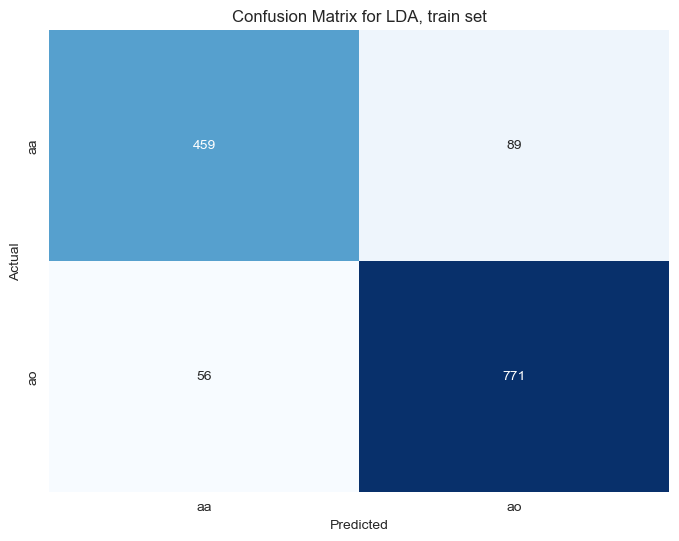

In [84]:
res_lda = getLDAerror('aa', 'ao', returnPred=True)
y_true, y_pred = np.array(res_lda['y_train']), np.array(res_lda['y_train_pred'])

cm_lda = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA, train set')
plt.show()

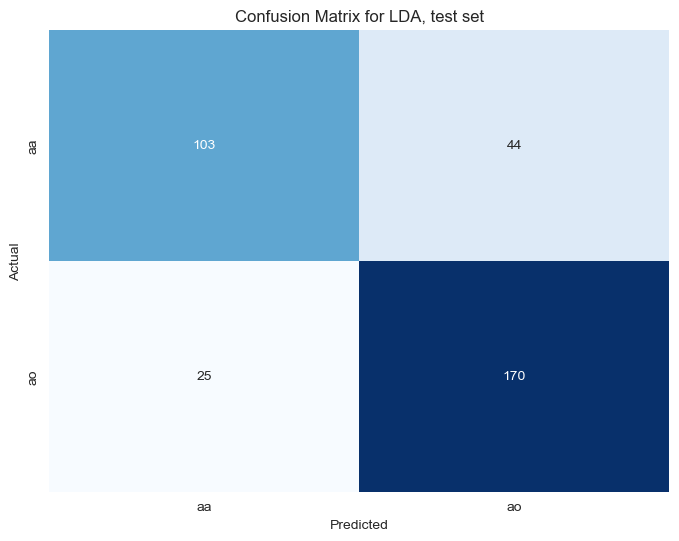

In [85]:
y_true, y_pred = np.array(res_lda['y_test']), np.array(res_lda['y_test_pred'])

cm_lda = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA, test set')
plt.show()

QDA training error for aa, ao: 0.10545
QDA test set error for aa, ao: 0.20175


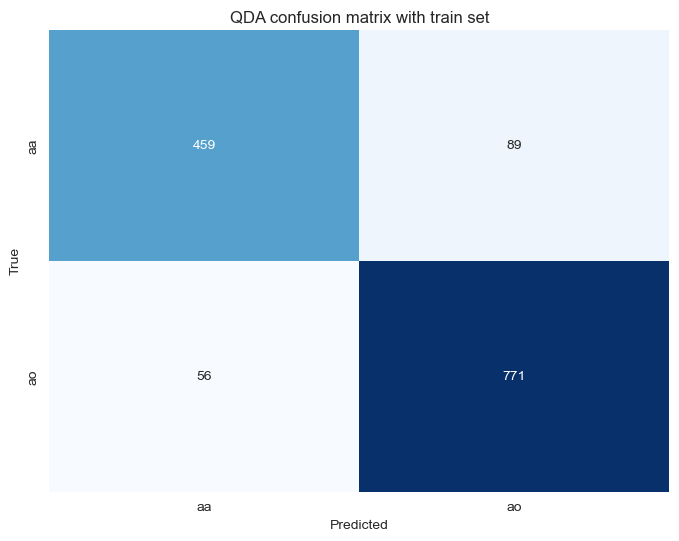

In [86]:
res_qda = getQDAError('aa', 'ao', returnPred=True)
y_true_qda, y_pred_qda = np.array(res_qda['y_train']), np.array(res_qda['y_train_pred'])

cm_qda = confusion_matrix(y_true_qda, y_pred_qda)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_true_qda), yticklabels=np.unique(y_true_qda))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('QDA confusion matrix with train set')
plt.show()

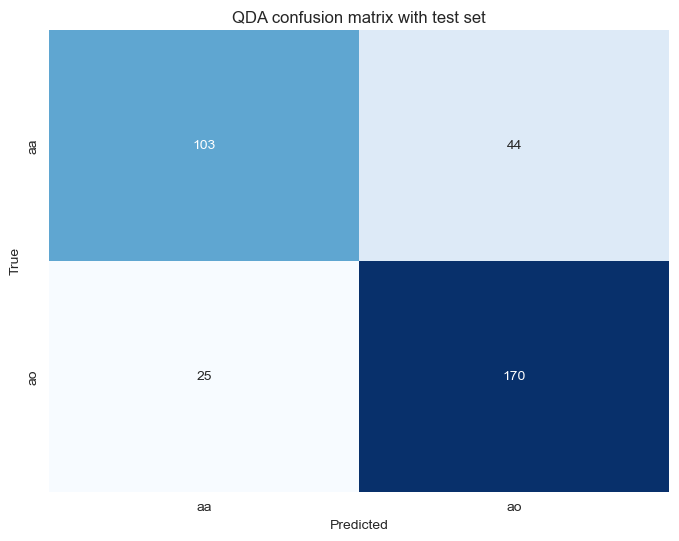

In [87]:
y_true_qda, y_pred_qda = np.array(res_qda['y_test']), np.array(res_qda['y_test_pred'])

cm_qda = confusion_matrix(y_true_qda, y_pred_qda)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_true_qda), yticklabels=np.unique(y_true_qda))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('QDA confusion matrix with test set')
plt.show()